In [ ]:
# Download the sample images
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1gTsX8yMtbi4Dq8oHJpqg9VQ3hcB4di5A -O reference_image_1.jpg

!wget --no-check-certificate \
    https://drive.google.com/uc?id=19WE6K3ljoJT8phAWk7wP09mYJ5bJ98gm -O test_image_1.jpg

!wget --no-check-certificate \
    https://drive.google.com/uc?id=1UAGF1bFaBRdpwwCWNc373lJwVINff7MT -O reference_image_2.tif

!wget --no-check-certificate \
    https://drive.google.com/uc?id=1pVa-8Nwr0n4BMYMI6-XXemxjh5E0HHlG -O test_image_2.tif

--2024-10-15 15:01:17--  https://drive.google.com/uc?id=1gTsX8yMtbi4Dq8oHJpqg9VQ3hcB4di5A
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.138, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1gTsX8yMtbi4Dq8oHJpqg9VQ3hcB4di5A [following]
--2024-10-15 15:01:17--  https://drive.usercontent.google.com/download?id=1gTsX8yMtbi4Dq8oHJpqg9VQ3hcB4di5A
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2623657 (2.5M) [image/jpeg]
Saving to: ‘reference_image_1.jpg’

reference_image_1.j 100%[===================>]   2.50M  13.3MB/s    in 0.2s    

2024-10-15 15:01:19 (13.3 MB/s) - ‘referen

In [ ]:
# importing necessary packages
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

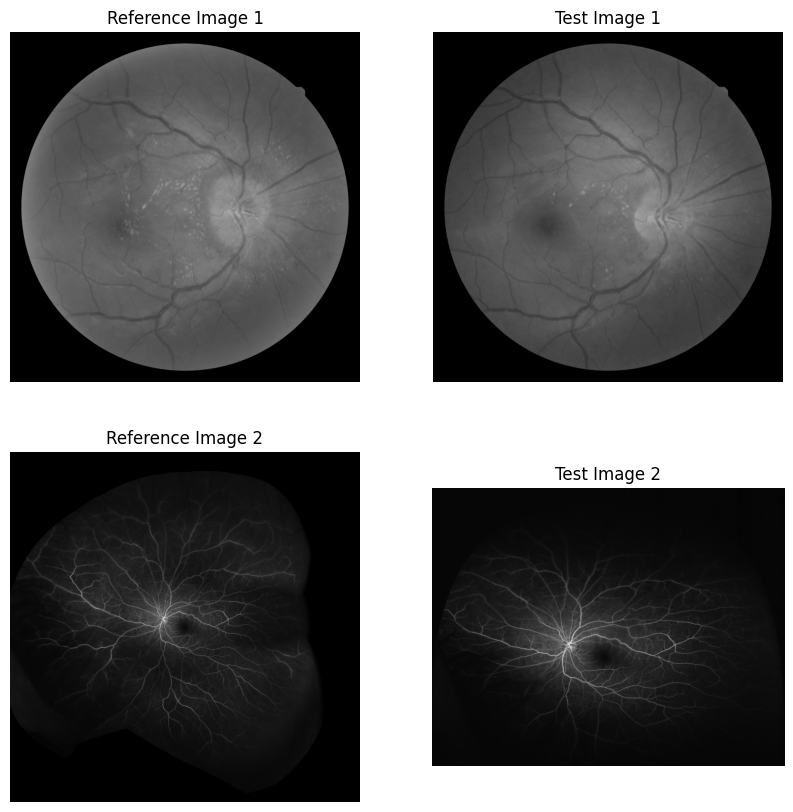

In [ ]:
# load and display images
reference_image_1 = cv2.imread('reference_image_1.jpg', cv2.IMREAD_GRAYSCALE)
reference_image_2 = cv2.imread('reference_image_2.tif', cv2.IMREAD_GRAYSCALE)

test_image_1 = cv2.imread('test_image_1.jpg', cv2.IMREAD_GRAYSCALE)
test_image_2 = cv2.imread('test_image_2.tif', cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(reference_image_1, cmap='gray')
axs[0, 0].set_title("Reference Image 1")
axs[0, 1].imshow(test_image_1, cmap='gray')
axs[0, 1].set_title("Test Image 1")
axs[1, 0].imshow(reference_image_2, cmap='gray')
axs[1, 0].set_title("Reference Image 2")
axs[1, 1].imshow(test_image_2, cmap='gray')
axs[1, 1].set_title("Test Image 2")

for ax in axs.flat:
    ax.axis('off')

In [ ]:
# reference_img_x, reference_img_y, test_img_x, test_img_y
CONTROL_POINTS_1 = [
  [332.000, 872.000, 388.000, 822.000],
  [370.000, 1897.000, 357.000, 1849.000],
  [1212.000, 2483.000, 1153.000, 2487.000],
  [1761.000, 348.000, 1843.000, 400.000],
  [2384.000, 1912.000, 2358.000, 2000.000],
  [2527.000, 1099.000, 2556.000, 1198.000],
  [1922.000, 1131.000, 1949.000, 1194.000],
  [642.000, 1222.000, 670.000, 1192.000],
  [1930.000, 1408.000, 1944.000, 1460.000],
  [1339.000, 1768.000, 1328.000, 1784.000]
]


CONTROL_POINTS_2 = [
  [1276.7,1697.5,793.81,1439.19],
  [1725.5,1314.3,1397.56,926.19],
  [1965.98,1195.38,1811.19,763.81],
  [2600.29,1390.69,2884.81,1087.44],
  [2447.66,1640.86,2624.19,1375.81],
  [1836.78,1760.34,1638.69,1492.81],
  [1464.01,1530.99,1022.56,1223.56],
  [1286.35,2101.64,827.19,1913.94],
  [1844.89,2130.84,1656.69,1999.81],
  [2344.07,1997.9,2468.56,1837.06],
  [2215.9,2228.81,2276.94,2155.06],
  [1840.87,2564.24,1625.94,2602.06],
  [2577.49,2438.16,2894.19,2383.06],
  [1414.47,1047.6,766.44,711.69]
]

# 1. CALCULATE THE AFFINE TRANSFORM MATRIX

In [75]:
import numpy as np

def create_matrixAB(CONTROL_POINTS):
  # Number of points
  num_points = len(CONTROL_POINTS)

  # Initialize the matrix A with the appropriate size
  A = np.zeros((num_points * 2, 6), dtype=np.float64)
  B = np.zeros(num_points * 2, dtype=np.float64)

  # Fill the matrix A and B using a loop
  for i in range(num_points):
    A[2 * i] = [CONTROL_POINTS[i][0], CONTROL_POINTS[i][1], 1, 0, 0, 0]
    A[2 * i + 1] = [0, 0, 0, CONTROL_POINTS[i][0], CONTROL_POINTS[i][1], 1]
    B[2 * i] = CONTROL_POINTS[i][2]
    B[2 * i + 1] = CONTROL_POINTS[i][3]

  return A, B

def calculate_transformation_matrix(A, B):
  # Calculate the least squares solution
  x, residuals, rank, s = np.linalg.lstsq(A, B, rcond=None)
  return x;


# 2. APPLY TRANSFORMATION MATRIX TO PERFORM REGISTRATION

Least Squares Solution Matrix: 
 [ 9.94820069e-01 -6.72158598e-02  1.15212168e+02  6.80550151e-02
  9.95776104e-01 -6.75559369e+01]
Least Squares Solution Matrix: 
 [ 1.62683291e+00  8.40784864e-02 -1.50587566e+03  9.92188434e-03
  1.27168356e+00 -7.28344685e+02]


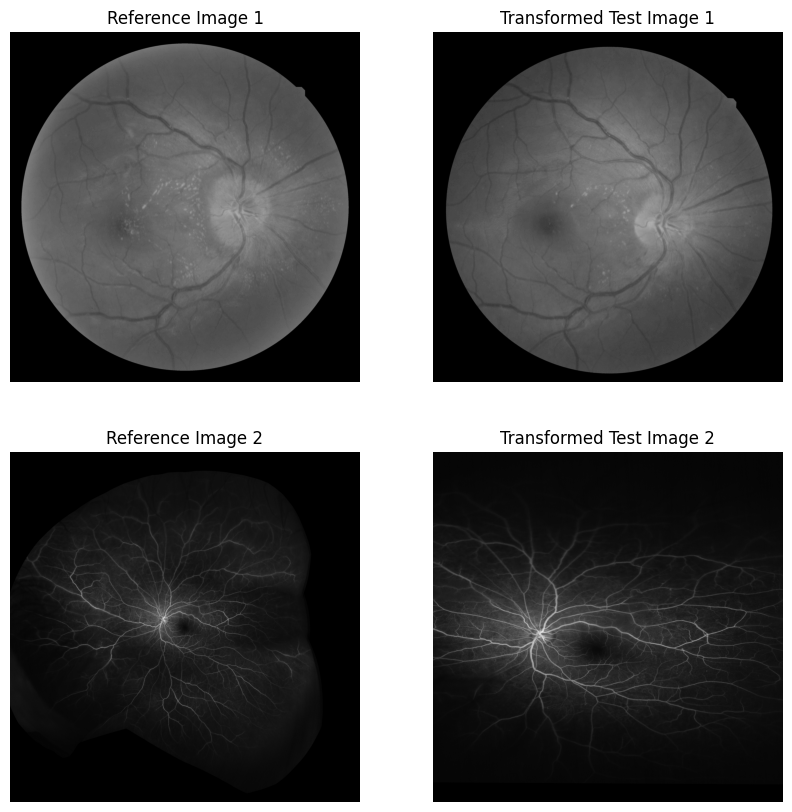

In [76]:
def apply_affine_transform(reference_image, test_image, CONTROL_POINTS):
  A, B = create_matrixAB(CONTROL_POINTS)

  x = calculate_transformation_matrix(A, B)

  print("Least Squares Solution Matrix: \n", x)

  transformation_matrix = np.array([[x[0], x[1], x[2]], [x[3], x[4], x[5]]])
  extended_affine_matrix = np.vstack([transformation_matrix, [0, 0, 1]])

  transformed_image = cv2.warpAffine(test_image, extended_affine_matrix[:2], (test_image.shape[1], test_image.shape[0]), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))



  return transformed_image, extended_affine_matrix



transformed_image_1, affine_matrix_1 = apply_affine_transform(reference_image_1, test_image_1, CONTROL_POINTS_1)
transformed_image_2, affine_matrix_2 = apply_affine_transform(reference_image_2, test_image_2, CONTROL_POINTS_2)


# Display the transformed images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(reference_image_1, cmap='gray')
axs[0, 0].set_title("Reference Image 1")
axs[0, 1].imshow(transformed_image_1, cmap='gray')
axs[0, 1].set_title("Transformed Test Image 1")
axs[1, 0].imshow(reference_image_2, cmap='gray')
axs[1, 0].set_title("Reference Image 2")
axs[1, 1].imshow(transformed_image_2, cmap='gray')
axs[1, 1].set_title("Transformed Test Image 2")

for ax in axs.flat:
    ax.axis('off')

plt.show()

# 3. CALCULATE THE MEAN SQUARED ERROR

MSE for Test Image 1: 0.3903817532386431
MSE for Test Image 2: 2.185867362685376


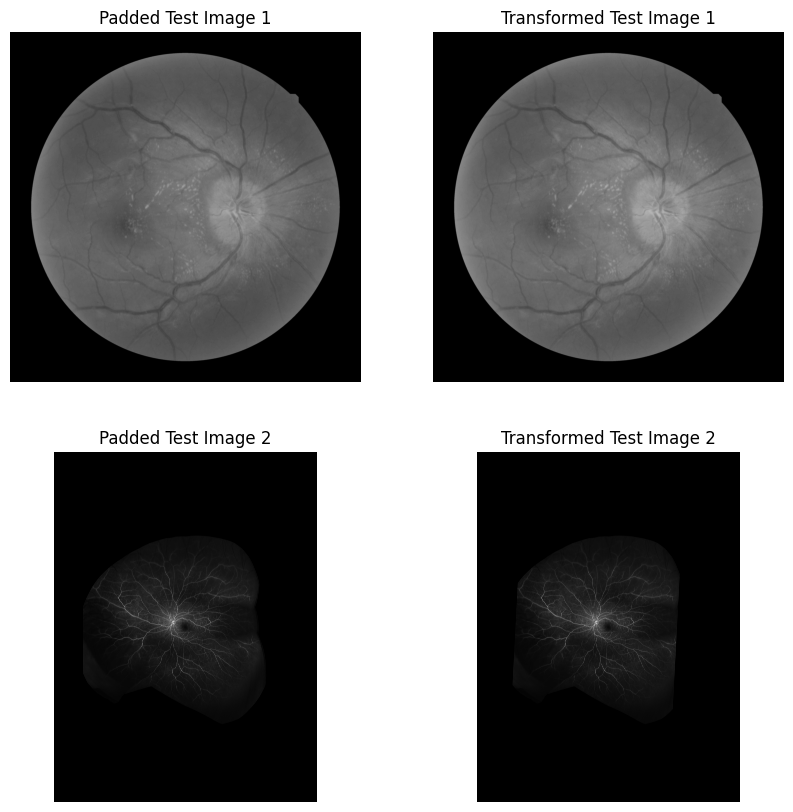

In [74]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_mse(image1, image2):
    # Calculate the mean squared error
    mse = np.mean((image1 - image2) ** 2)
    return mse

def apply_affine_transform_(image, transformation_matrix):
    # Calculate padding to ensure content stays within boundaries
    max_height = max(image.shape[0], int(image.shape[0] * abs(transformation_matrix[0, 1]) + image.shape[1] * abs(transformation_matrix[0, 0])))
    max_width = max(image.shape[1], int(image.shape[0] * abs(transformation_matrix[1, 1]) + image.shape[1] * abs(transformation_matrix[1, 0])))

    pad_height = max_height - image.shape[0]
    pad_width = max_width - image.shape[1]

    # Apply padding
    padded_image = cv2.copyMakeBorder(image, pad_height // 2, pad_height - pad_height // 2, pad_width // 2, pad_width - pad_width // 2, cv2.BORDER_CONSTANT, value=0)

    # Apply transformation to the padded image
    I_prime = cv2.warpAffine(padded_image, transformation_matrix[:2], (padded_image.shape[1], padded_image.shape[0]), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

    # Invert transformation matrix
    inverted_transformation_matrix = np.linalg.inv(transformation_matrix)

    # Apply inverse transformation
    I_double_prime = cv2.warpAffine(I_prime, inverted_transformation_matrix[:2], (padded_image.shape[1], padded_image.shape[0]), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

    # Calculate MSE using original and transformed images
    mse = calculate_mse(padded_image, I_double_prime)

    return padded_image, I_double_prime, mse

# Apply transformations and calculate MSE for both images
padded_image_1, test_double_prime_1, mse_1 = apply_affine_transform_(reference_image_1, affine_matrix_1)
padded_image_2, test_double_prime_2, mse_2 = apply_affine_transform_(reference_image_2, affine_matrix_2)

# Print MSE values
if mse_1 is not None and mse_2 is not None:
    print(f"MSE for Test Image 1: {mse_1}")
    print(f"MSE for Test Image 2: {mse_2}")

# Display results (Optional)
fig2, axs2 = plt.subplots(2, 2, figsize=(10, 10))

axs2[0, 0].imshow(padded_image_1, cmap='gray')
axs2[0, 0].set_title("Padded Test Image 1")
axs2[0, 1].imshow(test_double_prime_1, cmap='gray')
axs2[0, 1].set_title("Transformed Test Image 1")
axs2[1, 0].imshow(padded_image_2, cmap='gray')
axs2[1, 0].set_title("Padded Test Image 2")
axs2[1, 1].imshow(test_double_prime_2, cmap='gray')
axs2[1, 1].set_title("Transformed Test Image 2")

for ax in axs2.flat:
    ax.axis('off')

plt.show()